# Summary statistics

`ScmRun` objects have methods specific to calculating summary statistics. In this notebook we demonstrate them.

In [1]:
# NBVAL_IGNORE_OUTPUT
import traceback

import matplotlib.pyplot as plt
import numpy as np

from scmdata.run import ScmRun, run_append

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

## Helper bits and piecs

In [3]:
def new_timeseries(
    n=101,
    count=1,
    model="example",
    scenario="ssp119",
    variable="Surface Temperature",
    unit="K",
    region="World",
    cls=ScmRun,
    **kwargs,
):
    data = np.random.rand(n, count) * np.arange(n)[:, np.newaxis]
    index = 2000 + np.arange(n)
    return cls(
        data,
        columns={
            "model": model,
            "scenario": scenario,
            "variable": variable,
            "region": region,
            "unit": unit,
            **kwargs,
        },
        index=index,
    )

Let's create an `ScmRun` which contains a few variables and a number of runs. Such a dataframe would be used to store the results from an ensemble of simple climate model runs.

In [4]:
# NBVAL_IGNORE_OUTPUT
runs = run_append(
    [
        new_timeseries(
            count=3,
            variable=[
                "Surface Temperature",
                "Atmospheric Concentrations|CO2",
                "Radiative Forcing",
            ],
            unit=["K", "ppm", "W/m^2"],
            run_id=run_id,
        )
        for run_id in range(10)
    ]
)
runs.metadata["source"] = "fake data"
runs

<scmdata.ScmRun (timeseries: 30, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model region  run_id scenario   unit                        variable
	0   example  World       0   ssp119      K             Surface Temperature
	1   example  World       0   ssp119    ppm  Atmospheric Concentrations|CO2
	2   example  World       0   ssp119  W/m^2               Radiative Forcing
	3   example  World       1   ssp119      K             Surface Temperature
	4   example  World       1   ssp119    ppm  Atmospheric Concentrations|CO2
	5   example  World       1   ssp119  W/m^2               Radiative Forcing
	6   example  World       2   ssp119      K             Surface Temperature
	7   example  World       2   ssp119    ppm  Atmospheric Concentrations|CO2
	8   example  World       2   ssp119  W/m^2               Radiative Forcing
	9   example  World       3   ssp119      K             Surface Temperature
	10  example  World       3   ssp119    ppm  At

## `process_over`

The `process_over` method allows us to calculate a specific set of statistics.

In [5]:
print(runs.process_over.__doc__)


        Process the data over the input columns.

        Parameters
        ----------
        cols
            Columns to perform the operation on. The timeseries will be grouped by all
            other columns in :attr:`meta`.

        operation : ['median', 'mean', 'quantile']
            The operation to perform. This uses the equivalent pandas function. Note
            that quantile means the value of the data at a given point in the cumulative
            distribution of values at each point in the timeseries, for each timeseries
            once the groupby is applied. As a result, using ``q=0.5`` is is the same as
            taking the median and not the same as taking the mean/average.

        na_override: [int, float]
            Convert any nan value in the timeseries meta to this value during processsing.
            The meta values converted back to nan's before the dataframe is returned. This
            should not need to be changed unless the existing metadata cla

### Mean

In [6]:
# NBVAL_IGNORE_OUTPUT
mean = runs.process_over(cols="run_id", operation="mean")
mean

time                                                          2000-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example         0.0   
                W/m^2 Radiative Forcing              example         0.0   
                ppm   Atmospheric Concentrations|CO2 example         0.0   

time                                                          2001-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    0.573829   
                W/m^2 Radiative Forcing              example    0.500814   
                ppm   Atmospheric Concentrations|CO2 example    0.403182   

time                                                          2002-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    0.873771   
                W/m^2 Radiative Forcing              example    0.942486   
                ppm   Atmospheric Concentrations|CO2 example    1.337796   

time                                                          2003-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    1.692564   
                W/m^2 Radiative Forcing              example    2.027320   
                ppm   Atmospheric Concentrations|CO2 example    1.522716   

time                                                          2004-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    1.713242   
                W/m^2 Radiative Forcing              example    2.042163   
                ppm   Atmospheric Concentrations|CO2 example    1.547250   

time                                                          2005-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    1.458253   
                W/m^2 Radiative Forcing              example    1.581773   
                ppm   Atmospheric Concentrations|CO2 example    1.652718   

time                                                          2006-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    2.119288   
                W/m^2 Radiative Forcing              example    2.828487   
                ppm   Atmospheric Concentrations|CO2 example    2.467911   

time                                                          2007-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    4.162269   
                W/m^2 Radiative Forcing              example    4.445655   
                ppm   Atmospheric Concentrations|CO2 example    3.371767   

time                                                          2008-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    3.970205   
                W/m^2 Radiative Forcing              example    3.146198   
                ppm   Atmospheric Concentrations|CO2 example    3.628301   

time                                                          2009-01-01  ...  \
region scenario unit  variable                       model                ...   
World  ssp119   K     Surface Temperature            example    3.899548  ...   
                W/m^2 Radiative Forcing              example    3.904192  ...   
                ppm   Atmospheric Concentrations|CO2 example    5.368856  ...   

time                                                          2091-01-01  \
region scenario unit  variable                       model                 
World  ssp119

### Median

In [7]:
# NBVAL_IGNORE_OUTPUT
median = runs.process_over(cols="run_id", operation="median")
median

time                                                          2000-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example         0.0   
                W/m^2 Radiative Forcing              example         0.0   
                ppm   Atmospheric Concentrations|CO2 example         0.0   

time                                                          2001-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    0.645698   
                W/m^2 Radiative Forcing              example    0.476797   
                ppm   Atmospheric Concentrations|CO2 example    0.249041   

time                                                          2002-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    0.898557   
                W/m^2 Radiative Forcing              example    0.698405   
                ppm   Atmospheric Concentrations|CO2 example    1.489581   

time                                                          2003-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    1.748202   
                W/m^2 Radiative Forcing              example    2.086466   
                ppm   Atmospheric Concentrations|CO2 example    1.610132   

time                                                          2004-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    1.343086   
                W/m^2 Radiative Forcing              example    1.665609   
                ppm   Atmospheric Concentrations|CO2 example    1.348436   

time                                                          2005-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    1.383782   
                W/m^2 Radiative Forcing              example    1.256772   
                ppm   Atmospheric Concentrations|CO2 example    0.960000   

time                                                          2006-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    1.534589   
                W/m^2 Radiative Forcing              example    2.722350   
                ppm   Atmospheric Concentrations|CO2 example    1.841209   

time                                                          2007-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    4.592079   
                W/m^2 Radiative Forcing              example    4.206761   
                ppm   Atmospheric Concentrations|CO2 example    3.422681   

time                                                          2008-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    3.585559   
                W/m^2 Radiative Forcing              example    2.482300   
                ppm   Atmospheric Concentrations|CO2 example    4.164153   

time                                                          2009-01-01  ...  \
region scenario unit  variable                       model                ...   
World  ssp119   K     Surface Temperature            example    3.333878  ...   
                W/m^2 Radiative Forcing              example    3.239120  ...   
                ppm   Atmospheric Concentrations|CO2 example    5.714443  ...   

time                                                          2091-01-01  \
region scenario unit  variable                       model                 
World  ssp119

### Other quantiles

In [8]:
# NBVAL_IGNORE_OUTPUT
lower_likely_quantile = runs.process_over(
    cols="run_id", operation="quantile", q=0.17
)
lower_likely_quantile

time                                                          2000-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example         0.0   
                W/m^2 Radiative Forcing              example         0.0   
                ppm   Atmospheric Concentrations|CO2 example         0.0   

time                                                          2001-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    0.308837   
                W/m^2 Radiative Forcing              example    0.269550   
                ppm   Atmospheric Concentrations|CO2 example    0.159063   

time                                                          2002-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    0.184494   
                W/m^2 Radiative Forcing              example    0.593950   
                ppm   Atmospheric Concentrations|CO2 example    0.903523   

time                                                          2003-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    1.067730   
                W/m^2 Radiative Forcing              example    1.332016   
                ppm   Atmospheric Concentrations|CO2 example    0.905079   

time                                                          2004-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    0.507092   
                W/m^2 Radiative Forcing              example    0.978362   
                ppm   Atmospheric Concentrations|CO2 example    0.233877   

time                                                          2005-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    0.218969   
                W/m^2 Radiative Forcing              example    0.356070   
                ppm   Atmospheric Concentrations|CO2 example    0.521657   

time                                                          2006-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    0.591528   
                W/m^2 Radiative Forcing              example    1.104136   
                ppm   Atmospheric Concentrations|CO2 example    0.945388   

time                                                          2007-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    2.270411   
                W/m^2 Radiative Forcing              example    2.703952   
                ppm   Atmospheric Concentrations|CO2 example    2.044918   

time                                                          2008-01-01  \
region scenario unit  variable                       model                 
World  ssp119   K     Surface Temperature            example    2.399053   
                W/m^2 Radiative Forcing              example    0.732651   
                ppm   Atmospheric Concentrations|CO2 example    1.560836   

time                                                          2009-01-01  ...  \
region scenario unit  variable                       model                ...   
World  ssp119   K     Surface Temperature            example    1.506245  ...   
                W/m^2 Radiative Forcing              example    1.838883  ...   
                ppm   Atmospheric Concentrations|CO2 example    2.012569  ...   

time                                                          2091-01-01  \
region scenario unit  variable                       model                 
World  ssp119

## `quantiles_over`

If you want to calculate more than one summary statistic, `quantiles_over` will calculate and label multiple summary statistics before returning them.

In [9]:
print(runs.quantiles_over.__doc__)


        Calculate quantiles of the data over the input columns.

        Parameters
        ----------
        cols
            Columns to perform the operation on. The timeseries will be grouped by all
            other columns in :attr:`meta`.

        quantiles
            The quantiles to calculate. This should be a list of quantiles to calculate
            (quantile values between 0 and 1). ``quantiles`` can also include the strings
            "median" or "mean" if these values are to be calculated.

        **kwargs
            Passed to :meth:`~ScmRun.process_over`.

        Returns
        -------
        :obj:`pd.DataFrame`
            The quantiles of the timeseries, grouped by all columns in :attr:`meta`
            other than :obj:`cols`. Each calculated quantile is given a label which is
            stored in the ``quantile`` column within the output index.

        Raises
        ------
        TypeError
            ``operation`` is included in ``kwargs``. The operatio

In [10]:
# NBVAL_IGNORE_OUTPUT
summary_stats = runs.quantiles_over(
    cols="run_id", quantiles=[0.05, 0.17, 0.5, 0.83, 0.95, "mean", "median"]
)
summary_stats

time                                                                   2000-01-01  \
region scenario unit  variable                       model   quantile               
World  ssp119   K     Surface Temperature            example 0.05             0.0   
                W/m^2 Radiative Forcing              example 0.05             0.0   
                ppm   Atmospheric Concentrations|CO2 example 0.05             0.0   
                K     Surface Temperature            example 0.17             0.0   
                W/m^2 Radiative Forcing              example 0.17             0.0   
                ppm   Atmospheric Concentrations|CO2 example 0.17             0.0   
                K     Surface Temperature            example 0.5              0.0   
                W/m^2 Radiative Forcing              example 0.5              0.0   
                ppm   Atmospheric Concentrations|CO2 example 0.5              0.0   
                K     Surface Temperature            example 0.83             0.0   
                W/m^2 Radiative Forcing              example 0.83             0.0   
                ppm   Atmospheric Concentrations|CO2 example 0.83             0.0   
                K     Surface Temperature            example 0.95             0.0   
                W/m^2 Radiative Forcing              example 0.95             0.0   
                ppm   Atmospheric Concentrations|CO2 example 0.95             0.0   
                K     Surface Temperature            example mean             0.0   
                W/m^2 Radiative Forcing              example mean             0.0   
                ppm   Atmospheric Concentrations|CO2 example mean             0.0   
                K     Surface Temperature            example median           0.0   
                W/m^2 Radiative Forcing              example median           0.0   
                ppm   Atmospheric Concentrations|CO2 example median           0.0   

time                                                                   2001-01-01  \
region scenario unit  variable                       model   quantile               
World  ssp119   K     Surface Temperature            example 0.05        0.227186   
                W/m^2 Radiative Forcing              example 0.05        0.150697   
                ppm   Atmospheric Concentrations|CO2 example 0.05        0.065602   
                K     Surface Temperature            example 0.17        0.308837   
                W/m^2 Radiative Forcing              example 0.17        0.269550   
                ppm   Atmospheric Concentrations|CO2 example 0.17        0.159063   
                K     Surface Temperature            example 0.5         0.645698   
                W/m^2 Radiative Forcing              example 0.5         0.476797   
                ppm   Atmospheric Concentrations|CO2 example 0.5         0.249041   
                K     Surface Temperature            example 0.83        0.820748   
                W/m^2 Radiative Forcing              example 0.83        0.717168   
                ppm   Atmospheric Concentrations|CO2 example 0.83        0.743933   
                K     Surface Temperature            example 0.95        0.878118   
                W/m^2 Radiative Forcing              example 0.95        0.873543   
                ppm   Atmospheric Concentrations|CO2 example 0.95        0.907680   
                K     Surface Temperature            example mean        0.573829   
                W/m^2 Radiative Forcing              example mean        0.500814   
                ppm   Atmospheric Concentrations|CO2 example mean        0.403182   
                K     Surface Temperature            example median      0.645698   
                W/m^2 Radiative Forcing              example median      0.476797   
                ppm   Atmospheric Concentrations|CO2 example median      0.249041   

time                                                                   2002-01-01  \
reg

### Plotting

We can then cast the output of `quantiles_over` to an `ScmRun` object for ease of filtering and plotting.

In [11]:
summary_stats_scmrun = ScmRun(summary_stats)
summary_stats_scmrun

<scmdata.ScmRun (timeseries: 21, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model quantile region scenario   unit                        variable
	0   example     0.05  World   ssp119      K             Surface Temperature
	1   example     0.05  World   ssp119  W/m^2               Radiative Forcing
	2   example     0.05  World   ssp119    ppm  Atmospheric Concentrations|CO2
	3   example     0.17  World   ssp119      K             Surface Temperature
	4   example     0.17  World   ssp119  W/m^2               Radiative Forcing
	5   example     0.17  World   ssp119    ppm  Atmospheric Concentrations|CO2
	6   example      0.5  World   ssp119      K             Surface Temperature
	7   example      0.5  World   ssp119  W/m^2               Radiative Forcing
	8   example      0.5  World   ssp119    ppm  Atmospheric Concentrations|CO2
	9   example     0.83  World   ssp119      K             Surface Temperature
	10  example     0.83  World   ssp11

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

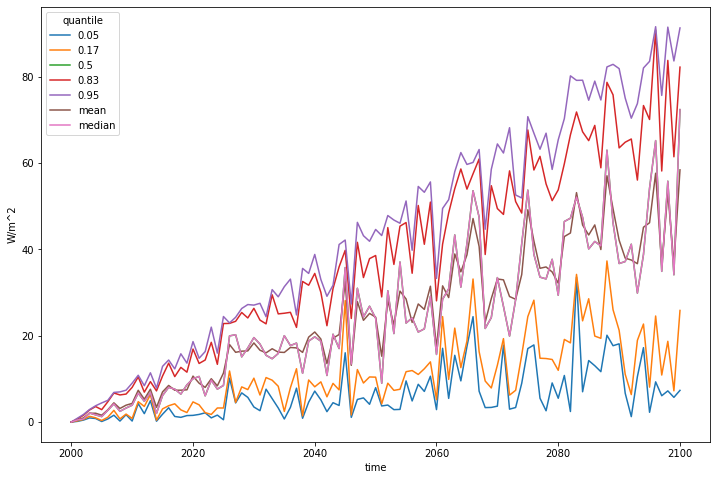

In [12]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun.filter(variable="Radiative Forcing").lineplot(
    hue="quantile"
)

In this case the default setttings in `plumeplot` don't produce anything that helpful, we show how to modify them in the cell below.

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x1087347d0>])

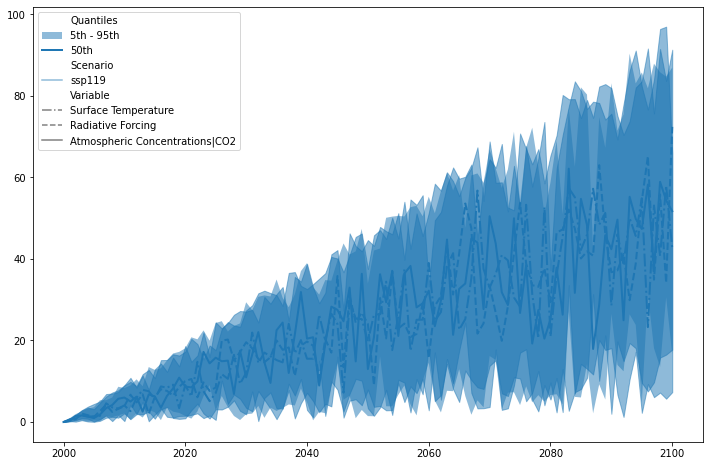

In [13]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun.plumeplot(time_axis="year")

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x1094c50d0>])

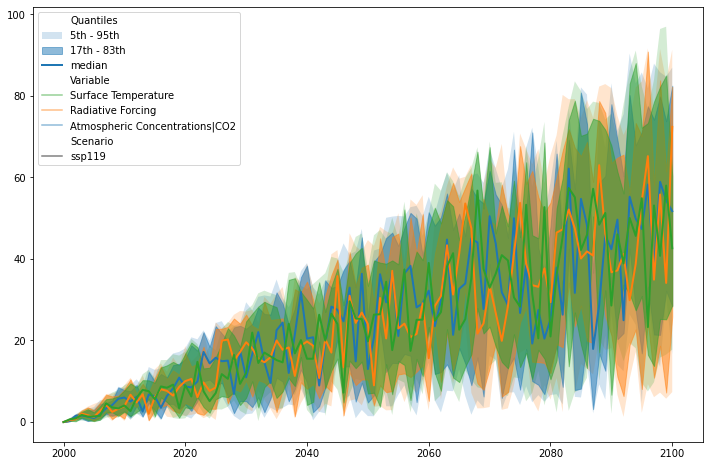

In [14]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun.plumeplot(
    quantiles_plumes=[
        ((0.05, 0.95), 0.2),
        ((0.17, 0.83), 0.5),
        (("median",), 1.0),
    ],
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
)